First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

states = pd.read_csv("datasets_95317_1078789_states_all.csv")
display(pd.DataFrame(states))
states.info()
print("TOTAL_REVENUE missing values:",states["TOTAL_REVENUE"].isnull().sum())
print("TOTAL_EXPENDITURE missing values:",states["TOTAL_EXPENDITURE"].isnull().sum())
states.isnull().sum()*100/states.shape[0]


print("TOTAL_REVENUE mean:",states.TOTAL_REVENUE.mean(),"\n","TOTAL_EXPENDITURE mean:",states.TOTAL_EXPENDITURE.mean())

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [309]:
print(states.TOTAL_REVENUE.describe())
print(states.TOTAL_EXPENDITURE.describe())
states2=states.copy()


count    1.275000e+03
mean     9.102045e+06
std      1.175962e+07
min      4.656500e+05
25%      2.189504e+06
50%      5.085826e+06
75%      1.084516e+07
max      8.921726e+07
Name: TOTAL_REVENUE, dtype: float64
count    1.275000e+03
mean     9.206242e+06
std      1.199279e+07
min      4.816650e+05
25%      2.170404e+06
50%      5.242672e+06
75%      1.074420e+07
max      8.532013e+07
Name: TOTAL_EXPENDITURE, dtype: float64


In [311]:
def missingvalue():

    for i in range(0,len(states)):
        if pd.isnull(states2["TOTAL_REVENUE"][i])==True:
            states2["TOTAL_REVENUE"][i]= states2.groupby("STATE").mean()["TOTAL_REVENUE"][states2["STATE"][i]]

    for i in range(0,len(states)):
        if pd.isnull(states2["TOTAL_EXPENDITURE"][i])==True:
            states2["TOTAL_EXPENDITURE"][i]= states2.groupby("STATE").mean()["TOTAL_EXPENDITURE"][states2["STATE"][i]]

missingvalue()


states.TOTAL_EXPENDITURE.dropna()
states.TOTAL_EXPENDITURE.dropna().isnull().sum()
states.TOTAL_REVENUE.dropna().isnull().sum()
states_full=states2.dropna()

1-See TOTAL_REVENUE, which includes total revenue data, and TOTAL_EXPENDITURE, which includes total spending data. Do these variables contain outliers?


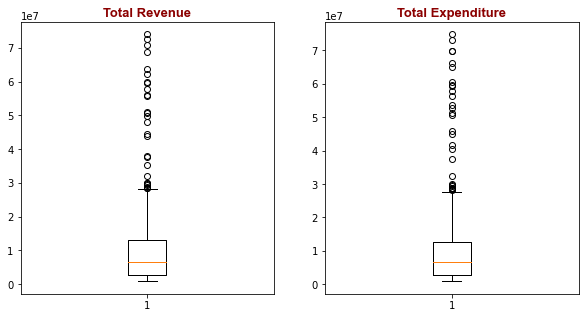

In [312]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.boxplot(states_full.TOTAL_REVENUE.dropna())
plt.title('Total Revenue', fontdict = title_font)


plt.subplot(122)
plt.boxplot(states_full.TOTAL_EXPENDITURE.dropna())
plt.title("Total Expenditure", fontdict=title_font)
plt.show()




In [313]:
def tukeymethod(data):
    q75, q25 = np.percentile(data, [75 ,25])
    IQR = q75 - q25
    threshold_values=[]
    for threshold_value in np.arange(1,5,0.5):
        min_value = q25 - (IQR*threshold_value)
        max_value = q75 + (IQR*threshold_value)
        outlier_value_number = len((np.where((data > max_value)| (data < min_value))[0]))
        threshold_values.append({'threshold_value': threshold_value,'outlier_value_number': outlier_value_number})
    pd.DataFrame(threshold_values)

    return threshold_values

In [314]:
x= tukeymethod(states_full["TOTAL_REVENUE"])
pd.DataFrame(x)

,threshold_value,outlier_value_number
0,1.0,42
1,1.5,28
2,2.0,20
3,2.5,17
4,3.0,17
5,3.5,14
6,4.0,11
7,4.5,8


In [315]:
y=tukeymethod(states_full["TOTAL_EXPENDITURE"])
pd.DataFrame(y)

,threshold_value,outlier_value_number
0,1.0,44
1,1.5,30
2,2.0,20
3,2.5,19
4,3.0,17
5,3.5,15
6,4.0,12
7,4.5,9


2-If you find outliers in the total income TOTAL_REVENUE and total expenditure TOTAL_EXPENDITURE variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.


Aykırı değerler için eşik değerimi her iki değişkende de 3 olarak belirledim. Bu yüzden aykırı değerler var. 

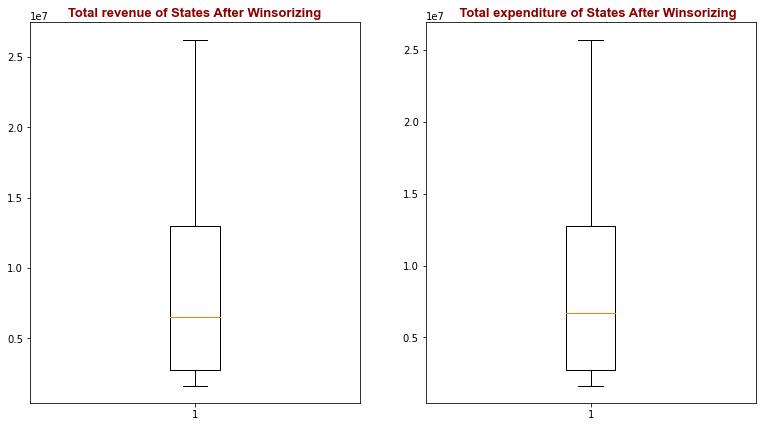

In [316]:
from scipy.stats.mstats import winsorize

#Winsorizing Method
def outlierscleaning():
    states_full["winsorizing_TotalRevenue"] = winsorize(np.array(states_full.TOTAL_REVENUE.dropna()),(0.10, 0.10))
    states_full["winsorizing_TotalExpenditure"] = winsorize(np.array(states_full.TOTAL_EXPENDITURE.dropna()),(0.10, 0.10))                                        
    
outlierscleaning()

plt.figure(figsize=(13,7))

plt.subplot(121)
plt.boxplot( states_full["winsorizing_TotalRevenue"])
plt.title("Total revenue of States After Winsorizing", fontdict=title_font)

plt.subplot(122)
plt.boxplot(states_full["winsorizing_TotalExpenditure"])
plt.title("    Total expenditure of States After Winsorizing", fontdict=title_font)


plt.show()

3-Subtract the total expenditure TOTAL_EXPENDITURE from the total income variable TOTAL_REVENUE to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.

In [317]:
states_full["BUDGET_DEFICIT"] = states_full.TOTAL_REVENUE-states_full.TOTAL_EXPENDITURE

In [318]:
t= tukeymethod(states_full["BUDGET_DEFICIT"])
pd.DataFrame(t)

,threshold_value,outlier_value_number
0,1.0,77
1,1.5,52
2,2.0,39
3,2.5,27
4,3.0,22
5,3.5,17
6,4.0,14
7,4.5,12


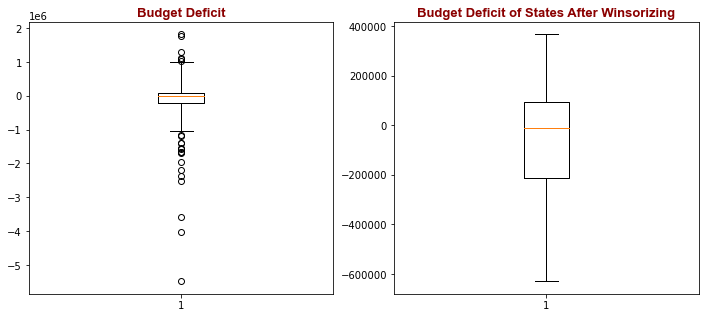

In [319]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.boxplot(states_full.BUDGET_DEFICIT.dropna(),whis=3)
plt.title("Budget Deficit", fontdict=title_font)


states_full["winsorizing_BudgetDeficit2"] = winsorize(np.array(states_full.BUDGET_DEFICIT.dropna()), (0.10, 0.10))
plt.subplot(122)
plt.boxplot(states_full["winsorizing_BudgetDeficit2"])
plt.title("Budget Deficit of States After Winsorizing", fontdict=title_font)



plt.show()


4- Again create a variable that can be considered as a budget deficit by subtracting the total income TOTAL_REVENUE variable from the total expenditure TOTAL_EXPENDITURE. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.

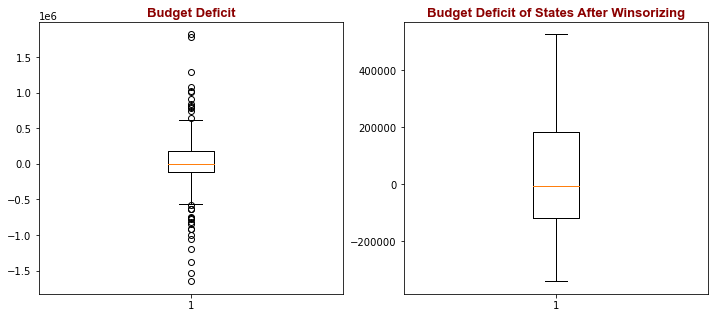

In [320]:
states_full["BUDGET_DEFICIT2"]=states_full["winsorizing_TotalRevenue"]-states_full["winsorizing_TotalExpenditure"]
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.boxplot(states_full["BUDGET_DEFICIT2"])
plt.title("Budget Deficit", fontdict=title_font)

states_full["BUDGET_DEFICIT2"]=winsorize(states_full["BUDGET_DEFICIT2"], (0.1,0.1))
plt.subplot(122)
plt.boxplot(states_full["BUDGET_DEFICIT2"])
plt.title("Budget Deficit of States After Winsorizing", fontdict=title_font)

plt.show()

5-Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?

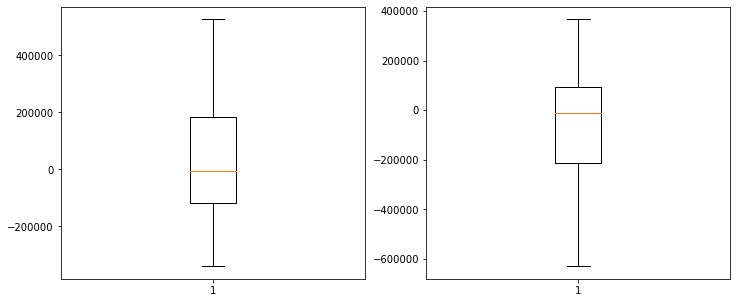

In [321]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.boxplot(states_full["BUDGET_DEFICIT2"])
plt.subplot(122)
plt.boxplot(states_full["winsorizing_BudgetDeficit2"])
plt.show()

6-If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?

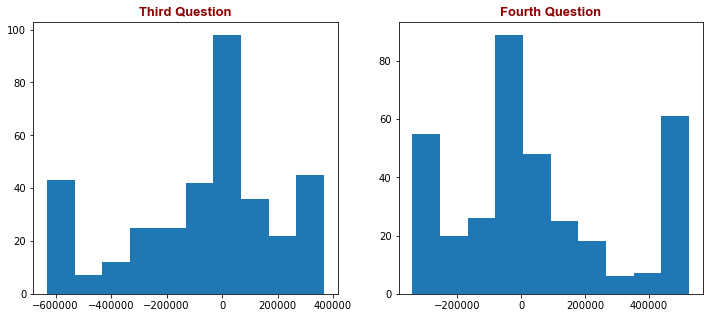

In [322]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.hist(states_full["winsorizing_BudgetDeficit2"])
plt.title("Third Question", fontdict=title_font)

plt.subplot(122)
plt.hist(states_full["BUDGET_DEFICIT2"])
plt.title("Fourth Question", fontdict=title_font)


plt.show()


In [323]:
total=np.abs(states_full["BUDGET_DEFICIT"]).sum()
third=np.abs(states_full["BUDGET_DEFICIT"] - states_full["winsorizing_BudgetDeficit2"]).sum()
fourth=np.abs(states_full["BUDGET_DEFICIT"] - states_full["BUDGET_DEFICIT2"]).sum()

print("Total absolute amount of deficit..............: {:.0f}".format(np.abs(total)))
print("3rd Q, difference between real and manipulated: {:.0f}".format(third))
print("4th Q, difference between real and manipulated: {:.0f}".format(fourth))
print("\n")
print("3rd Q, manipulation ratio: % {:.0f}".format(np.abs((third*100)/total)))
print("4th Q, manipulation ratio: % {:.0f}".format(np.abs((fourth*100)/total)))

Total absolute amount of deficit..............: 117510942
3rd Q, difference between real and manipulated: 41860275
4th Q, difference between real and manipulated: 76164117


3rd Q, manipulation ratio: % 36
4th Q, manipulation ratio: % 65


4. sorudaki manipülasyon oranı daha fazla olduğu için 3. sorudaki yöntem tercih edilmelidir.